<a href="https://colab.research.google.com/github/BernieT7/ML/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets         # 取得圖像資料用 # pytorch官網 > Docs > pytorch domain > Datasets
from torchvision.transforms import ToTensor   # 轉換成tensor用
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader     # 分堆用
from torch import nn
import torch

In [ ]:
train_data = datasets.FashionMNIST(
  root="image",     # 儲存檔名
  train=True,      # 取得訓練集
  download=True,
  transform=ToTensor()  # 轉換成tensor
)

test_data = datasets.FashionMNIST(
  root="image",     # 儲存檔名
  train=False,      # 取得測試集
  download=True,
  transform=ToTensor()  # 轉換成tensor
)

In [ ]:
img, label = train_data[0]
class_names = train_data.classes            # 可以取得圖像的結果，也就是y值
class_names[label]
img.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

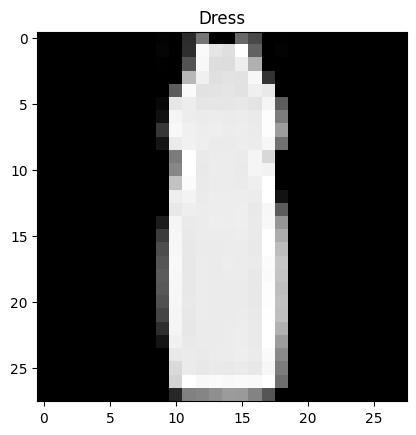

In [ ]:
random_idx = random.randint(0, len(train_data))
img, label = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0), cmap="gray")     # plt.imshow(圖, 顏色)可以畫出圖像， permute(新位置是原位置的誰)會幫我們交換順序
plt.title(class_names[label])

In [ ]:
# 過去gradient decent時，要看過所有的資料才能進行，但如果今天的資料非常大量將會遇到執行時間過長、記憶體暫存
# 空間不足等等問題，因此處理巨量資料時，我們需要做batch分堆的動作，這樣讀資料就不用讀取所有資料，讀取該堆就好
BATCH_SIZE = 32
train_dataloader = DataLoader(
  train_data,                  # 要分堆的資料(有x(圖形)跟y(類別))
  batch_size=BATCH_SIZE,            # 分堆總數==>資料總數/分堆大小
  shuffle=True                 # 是否打亂後再分堆
)

test_dataloader = DataLoader(
  test_data,
  batch_size=BATCH_SIZE,
  shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a6f8343cf40>,
 <torch.utils.data.dataloader.DataLoader at 0x7a6f834420b0>)

Text(0.5, 1.0, 'Sandal')

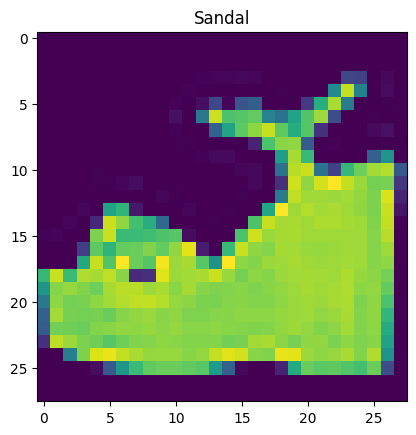

In [ ]:
# next(iter(所有堆))會取得下一推
x_first_batch, y_first_batch = next(iter(train_dataloader))
random_idx = random.randint(0, len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]

plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])

In [ ]:
# flatten攤平，將原本三維(height*width*channel)的特徵壓平成一維
# pytorch官網 > Docs > pytorch > torch.nn > Flatten
f = nn.Flatten(start_dim=0, end_dim=-1)     # start_dim是開始的維度, end_dim是結束的維度
f(x_first_batch[0]).shape

torch.Size([784])

In [ ]:
# 單層類神經網路
class ImageClassificationModel(nn.Module):                     # 創建模型類別
  def __init__(self, input_shape, output_shape):                #初始化
    super().__init__()
    self.layer_stack = nn.Sequential(                     # nn.Squentioal可以把類別初始函數包裝在一起
      nn.Flatten(start_dim=1, end_dim=-1),                  # 攤平
      nn.Linear(in_features=input_shape, out_features=output_shape),              # 輸入端，輸出端
#      nn.Softmax(dim=1)                            # 把輸出結果變成機率，利用softmax function
                                           # pytorch官網 > Docs > torch.nn > Non-linear Activations (other)
    )

  def forward(self, x):                             # forward函數
    return self.layer_stack(x)                         # return 10個y值

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# torch.manual_seed(87)
model = ImageClassificationModel(28*28, 10)                        # 建模
y_pred = model(x_first_batch)
y_pred.argmax(dim=1)

tensor([2, 3, 3, 0, 0, 9, 3, 5, 3, 3, 5, 0, 5, 5, 9, 5, 3, 5, 0, 2, 2, 5, 0, 5,
        3, 3, 5, 0, 9, 2, 5, 5])

In [ ]:
# cost function, cross entropy
# pytorch官網 > Docs > torch.nn > LossFunctions
# 注意!pytorch的cross entropy函式本身就會幫我們進行softmax，所以模型裡就不必再做softmax了
cost_fn = nn.CrossEntropyLoss()
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.3362, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0002,  0.0158,  0.0160,  ..., -0.0004,  0.0070, -0.0354],
        [-0.0323,  0.0144, -0.0127,  ...,  0.0072,  0.0071, -0.0241],
        [-0.0046,  0.0346,  0.0310,  ..., -0.0131, -0.0208, -0.0025],
        ...,
        [ 0.0058, -0.0147, -0.0356,  ...,  0.0072,  0.0278,  0.0095],
        [-0.0004,  0.0040, -0.0117,  ...,  0.0145,  0.0304, -0.0356],
        [-0.0050, -0.0313, -0.0328,  ...,  0.0224,  0.0158,  0.0083]])), ('layer_stack.1.bias', tensor([-0.0256, -0.0242, -0.0208,  0.0016, -0.0108,  0.0144,  0.0319, -0.0200,
         0.0293, -0.0290]))])
tensor(2.2181, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0002,  0.0158,  0.0160,  ..., -0.0003,  0.0070, -0.0354],
        [-0.0323,  0.0144, -0.0127,  ...,  0.0072,  0.0071, -0.0241],
        [-0.0046,  0.0346,  0.0310,  ..., -0.0131, -0.0208, -0.0025],
        ...,
        [ 0.0058, -0.0147, -0.0356,  ...,  0.0

In [ ]:
def accuracy_fn(y_pred, y_real):                           # 準確度函數
  correct_num = (y_pred==y_real).sum()
  acc = correct_num / len(y_real) * 100

  return acc

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)                                    # 模型連線到GPU

ImageClassificationModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
def train_step(dataloader, model, cost_fn, optimizer, accuracy_fn, device):   # 訓練函數
  train_cost = 0                                  # 令cost初始為0
  train_acc = 0                                  # 令acc初始為0
  for batch, (x, y) in enumerate(dataloader):                  # 跑過所有的Batch
    x = x.to(device)                               # x連線到GPU
    y = y.to(device)                               # y連線到GPU

    model.train()

    y_pred = model(x)

    cost = cost_fn(y_pred, y)

    train_cost += cost                              # 累加cost
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)              # 累加acc

    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

  train_cost /= len(train_dataloader)                       # 計算平均cost
  train_acc /= len(train_dataloader)                        # 計算平均acc

  print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")


def test_step(dataloader, model, cost_fn, accuracy_fn, device):          # 測試模型
  test_cost = 0                                  # 令cost初始為0
  test_acc = 0                                   # 令acc初始為0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:                           # 跑過所有的Batch
      x = x.to(device)                             # x連線到GPU
      y = y.to(device)                             # y連線到GPU

      test_pred = model(x)

      test_cost += cost_fn(test_pred, y)                   # 累加cost
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)           # 累加acc

    test_cost /= len(test_dataloader)                      # 計算平均cost
    test_acc /= len(test_dataloader)                       # 計算平均acc

  print(f"Test Cost: {test_cost:.4f}, Test Acc: {test_acc:.2f} \n")

In [ ]:
from tqdm.auto import tqdm                             # 顯示進度條

epochs = 10                                     # 訓練次數

for epoch in tqdm(range(epochs)):                          # 顯示進度條
  print(f"Epoch: {epoch}\n-------")

  train_step(train_dataloader, model, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 0.8138, Train Acc: 74.88
Test Cost: 0.6523, Test Acc: 78.20 

Epoch: 1
-------

Train Cost: 0.5879, Train Acc: 81.13
Test Cost: 0.5809, Test Acc: 80.82 

Epoch: 2
-------

Train Cost: 0.5390, Train Acc: 82.36
Test Cost: 0.5467, Test Acc: 81.76 

Epoch: 3
-------

Train Cost: 0.5129, Train Acc: 83.00
Test Cost: 0.5291, Test Acc: 82.12 

Epoch: 4
-------

Train Cost: 0.4961, Train Acc: 83.47
Test Cost: 0.5171, Test Acc: 82.45 

Epoch: 5
-------

Train Cost: 0.4834, Train Acc: 83.87
Test Cost: 0.5065, Test Acc: 82.69 

Epoch: 6
-------

Train Cost: 0.4740, Train Acc: 84.10
Test Cost: 0.4990, Test Acc: 83.02 

Epoch: 7
-------

Train Cost: 0.4661, Train Acc: 84.32
Test Cost: 0.4995, Test Acc: 82.54 

Epoch: 8
-------

Train Cost: 0.4603, Train Acc: 84.48
Test Cost: 0.4884, Test Acc: 83.25 

Epoch: 9
-------

Train Cost: 0.4548, Train Acc: 84.69
Test Cost: 0.4867, Test Acc: 82.87 



In [ ]:
# 多層類神經網路
class ImageClassificationModel2(nn.Module):                    # 創建模型類別
  def __init__(self, input_shape, output_shape):                #初始化
    super().__init__()
    self.layer_stack = nn.Sequential(                     #nn.Squentioal可以把類別初始函數包裝在一起
      nn.Flatten(start_dim=1, end_dim=-1),                  # 攤平
      nn.Linear(in_features=input_shape, out_features=5),           # 第一層， output=5         # 後一層input一等於前一層output
      nn.ReLU(),                                # 激活隱藏層函數
      nn.Linear(in_features=5, out_features=8),                # 第二層， output=8
      nn.ReLU(),                                # 激活隱藏層函數
      nn.Linear(in_features=8, out_features=output_shape),           # 第三層， output=輸出端
    )

  def forward(self, x):                             # forward函數
    return self.layer_stack(x)

In [ ]:
model_2 = ImageClassificationModel2(28*28, 10)
model_2.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_step(train_dataloader, model_2, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_2, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 1.3764, Train Acc: 47.27
Test Cost: 0.8585, Test Acc: 66.67 

Epoch: 1
-------

Train Cost: 0.7447, Train Acc: 72.03
Test Cost: 0.7253, Test Acc: 72.59 

Epoch: 2
-------

Train Cost: 0.6575, Train Acc: 76.19
Test Cost: 0.6412, Test Acc: 76.91 

Epoch: 3
-------

Train Cost: 0.6088, Train Acc: 78.39
Test Cost: 0.6153, Test Acc: 77.89 

Epoch: 4
-------

Train Cost: 0.5770, Train Acc: 79.65
Test Cost: 0.5884, Test Acc: 79.35 

Epoch: 5
-------

Train Cost: 0.5577, Train Acc: 80.54
Test Cost: 0.5790, Test Acc: 79.85 

Epoch: 6
-------

Train Cost: 0.5413, Train Acc: 81.23
Test Cost: 0.5615, Test Acc: 80.68 

Epoch: 7
-------

Train Cost: 0.5292, Train Acc: 81.56
Test Cost: 0.5468, Test Acc: 81.17 

Epoch: 8
-------

Train Cost: 0.5177, Train Acc: 81.98
Test Cost: 0.5453, Test Acc: 80.54 

Epoch: 9
-------

Train Cost: 0.5059, Train Acc: 82.38
Test Cost: 0.5361, Test Acc: 81.44 



In [ ]:
# 評估哪個模型比較好
def eval_model(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)

      test_pred = model(x)

      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  return {
      "model_name": model.__class__.__name__,             # 取得模型的名字
      "model_cost": test_cost.item(),                 # .item()只取得tensor的數字
      "model_acc": test_acc.item()
  }

In [ ]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_1_result, model_2_result

({'model_name': 'ImageClassificationModel',
  'model_cost': 0.48674795031547546,
  'model_acc': 82.8674087524414},
 {'model_name': 'ImageClassificationModel2',
  'model_cost': 0.5361374020576477,
  'model_acc': 81.439697265625})